# A practical analytical project from Quantum

## Overview

This project analyzes a customer transaction dataset and identifies customer purchasing behavior patterns to generate valuable insights and information.

#### Context

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for chips, who wants to better understand the types of customers who purchase chips and their purchasing behaviour within the region.

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

## Project Goals

Here are the main ponts of this project:
- examine and clean transaction and customer data.
- identify customer segments based on purchasing behavior.
- creating charts and graphs to present data insights.
- deriving commercial recommendations from data analysis.

## Actions

- Analyze transaction and customer data. 
- Develop metrics and examine sales drivers.
- Segment customers based on purchasing behavior.
- Create visualizations.
- Formulate a clear recommendation for the client's strategy.

## Data

There are two datasets provided for this project:
1. `QVI_transaction_data.xlsx` - This dataset contains customer transaction data.
2. `QVI_purchase_behaviour.csv` - This dataset contains purchase behavior data.

## Analysis

1. Examine transaction data
1. Examine customer data
1. Data analysis and customer segments
1. Define recommendation by customer segments

## Data preparation and customer analytics

In [210]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('max_colwidth', 0)

### Transaction dataset

Let's start by examining the transaction dataset.

In [212]:
# load the datasets

transactions = pd.read_excel('QVI_transaction_data.xlsx') #, nrows=10000)

In [213]:
# shape of datasets
print("Transactions dataset shape:", transactions.shape)

Transactions dataset shape: (264836, 8)


In [214]:
# inspect the first few rows of the transactions dataset
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80


In [215]:
# rename columns for better readability
transactions.rename(columns={'DATE': 'date',
                             'STORE_NBR': 'store_number',
                             'LYLTY_CARD_NBR': 'loyalty_card_number',
                             'TXN_ID': 'transaction_id',
                             'PROD_NBR': 'product_number',
                             'PROD_NAME': 'product_name',
                             'PROD_QTY': 'product_quantity',
                             'TOT_SALES': 'total_sales'}, inplace=True)
# inspect the first few rows after renaming columns
transactions.head()

,date,store_number,loyalty_card_number,transaction_id,product_number,product_name,product_quantity,total_sales
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80


In [216]:
# checking for data types
transactions.dtypes

date                   int64  
store_number           int64  
loyalty_card_number    int64  
transaction_id         int64  
product_number         int64  
product_name           object 
product_quantity       int64  
total_sales            float64
dtype: object

In [217]:
# checking for missing values
transactions.isna().sum()

date                   0
store_number           0
loyalty_card_number    0
transaction_id         0
product_number         0
product_name           0
product_quantity       0
total_sales            0
dtype: int64

In [218]:
# convert 'DATE' column to datetime format
# Excel's date system starts on 1899-12-30
transactions['date'] = pd.to_datetime(transactions['date'], origin='1899-12-30', unit='D')

In [219]:
# checking for data types again
transactions.dtypes

date                   datetime64[ns]
store_number           int64         
loyalty_card_number    int64         
transaction_id         int64         
product_number         int64         
product_name           object        
product_quantity       int64         
total_sales            float64       
dtype: object

In [220]:
# inspect the first few rows of transactions after date conversion
transactions.head()

,date,store_number,loyalty_card_number,transaction_id,product_number,product_name,product_quantity,total_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80


In [221]:
# shwow info about the dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 264836 non-null  datetime64[ns]
 1   store_number         264836 non-null  int64         
 2   loyalty_card_number  264836 non-null  int64         
 3   transaction_id       264836 non-null  int64         
 4   product_number       264836 non-null  int64         
 5   product_name         264836 non-null  object        
 6   product_quantity     264836 non-null  int64         
 7   total_sales          264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [222]:
# inspecting unique product names
transactions['product_name'].unique()[:10]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G'], dtype=object)

In [223]:
# cleaning product names column; removing leading/trailing spaces and extra spaces between words
transactions['product_name'] = transactions['product_name'].str.strip() \
    .str.replace(r'\s+', ' ', regex=True)

transactions['product_name'].head(10)


0    Natural Chip Compny SeaSalt175g         
1    CCs Nacho Cheese 175g                   
2    Smiths Crinkle Cut Chips Chicken 170g   
3    Smiths Chip Thinly S/Cream&Onion 175g   
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa Dip Tomato Mild 300g  
6    Smiths Crinkle Chips Salt & Vinegar 330g
7    Grain Waves Sweet Chilli 210g           
8    Doritos Corn Chip Mexican Jalapeno 150g 
9    Grain Waves Sour Cream&Chives 210G      
Name: product_name, dtype: object

In [224]:
# extracting weight from product names
transactions['product_weight'] = transactions['product_name'] \
    .str.extract(r'(\d+)[gG]') \
    .astype(float)

transactions.dtypes

date                   datetime64[ns]
store_number           int64         
loyalty_card_number    int64         
transaction_id         int64         
product_number         int64         
product_name           object        
product_quantity       int64         
total_sales            float64       
product_weight         float64       
dtype: object

In [225]:
# removing weight from product names
transactions['product_name'] = transactions['product_name'] \
    .str.replace(r'(\d+)[gG]', '', regex=True) \
    .str.strip()

Product names were cleaned by removing extra spaces and product weights.
Brand extraction was considered but not performed due to inconsistent naming and lack of a reliable rule-based approach.

In [226]:
# checking results
transactions.tail()

,date,store_number,loyalty_card_number,transaction_id,product_number,product_name,product_quantity,total_sales,product_weight
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.80,175.00
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.40,175.00
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.80,170.00
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.80,150.00
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime,2,8.80,175.00


Let's perform some basic text analysis by summarising the individual words in the `product_name` column.

In [227]:
# create a function to remove punctuation in text
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# create a list of unique products without punctuation
products = transactions['product_name'].apply(remove_punctuation).unique().tolist()
products[:10]  # display first 10 unique products

['Natural Chip Compny SeaSalt',
 'CCs Nacho Cheese',
 'Smiths Crinkle Cut Chips Chicken',
 'Smiths Chip Thinly SCreamOnion',
 'Kettle Tortilla ChpsHnyJlpno Chili',
 'Old El Paso Salsa Dip Tomato Mild',
 'Smiths Crinkle Chips Salt  Vinegar',
 'Grain Waves Sweet Chilli',
 'Doritos Corn Chip Mexican Jalapeno',
 'Grain Waves Sour CreamChives']

In [228]:
#  creating a list of all unique words in each product name
unique_world_list = []
for p in products:
    # add unique words to the list
    unique_world_list.extend(list(set(p.split())))
print(len(unique_world_list))
print(unique_world_list[:10])

465
['Natural', 'Compny', 'Chip', 'SeaSalt', 'CCs', 'Nacho', 'Cheese', 'Chips', 'Crinkle', 'Chicken']


In [229]:
# counting the words
words_count = []
for word in unique_world_list:
    x = unique_world_list.count(word)
    words_count.append((word, x))

words_count_set = set(words_count)
# words_count_set

In [230]:
# creating a DataFrame from the words count
pd.DataFrame(words_count_set, columns=['word', 'count']).sort_values(by='count', ascending=False).reset_index(drop=True).head(20)

,word,count
0,Chips,21
1,Smiths,16
2,Cut,14
3,Crinkle,14
4,Kettle,13
5,Cheese,12
6,Salt,12
7,Original,10
8,Chip,9
9,Salsa,9


In [231]:
# looking the product names with word 'salsa'
transactions[transactions['product_name'].str.contains('salsa', case=False, na=False)].head(10)

,date,store_number,loyalty_card_number,transaction_id,product_number,product_name,product_quantity,total_sales,product_weight
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.10,300.00
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild,1,5.10,300.00
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla,2,5.40,150.00
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa,1,2.60,150.00
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium,1,2.60,300.00
71,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht,1,5.10,300.00
74,2018-08-16,97,97159,97271,35,Woolworths Mild Salsa,5,7.50,300.00
87,2018-08-15,116,116184,120270,59,Old El Paso Salsa Dip Tomato Med,1,5.10,300.00
114,2018-08-16,157,157185,159562,59,Old El Paso Salsa Dip Tomato Med,2,10.20,300.00
131,2018-08-19,175,175306,176634,59,Old El Paso Salsa Dip Tomato Med,1,5.10,300.00


In [232]:
# remove products with word 'salsa' from the dataset
transactions = transactions[~transactions['product_name'].str.contains('salsa', case=False, na=False)]

In [233]:
# describing the dataset
transactions.describe()

,date,store_number,loyalty_card_number,transaction_id,product_number,product_quantity,total_sales,product_weight
count,246742,246742.00,246742.00,246742.00,246742.00,246742.00,246742.00,246742.00
mean,2018-12-30 01:19:01.211467520,135.05,135530.98,135131.10,56.35,1.91,7.32,175.59
min,2018-07-01 00:00:00,1.00,1000.00,1.00,1.00,1.00,1.70,70.00
25%,2018-09-30 00:00:00,70.00,70015.00,67569.25,26.00,2.00,5.80,150.00
50%,2018-12-30 00:00:00,130.00,130367.00,135183.00,53.00,2.00,7.40,170.00
75%,2019-03-31 00:00:00,203.00,203084.00,202653.75,87.00,2.00,8.80,175.00
max,2019-06-30 00:00:00,272.00,2373711.00,2415841.00,114.00,200.00,650.00,380.00
std,NaN,76.79,80715.28,78147.72,33.70,0.66,3.08,59.43


In [234]:
# checking the duplicates
transactions[transactions.duplicated(keep=False)]

,date,store_number,loyalty_card_number,transaction_id,product_number,product_name,product_quantity,total_sales,product_weight
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,2,6.00,175.00
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,2,6.00,175.00


In [235]:
# dropping duplicates
transactions.drop_duplicates(inplace=True)

In [236]:
# checking the duplicates again
transactions.duplicated().sum()

0

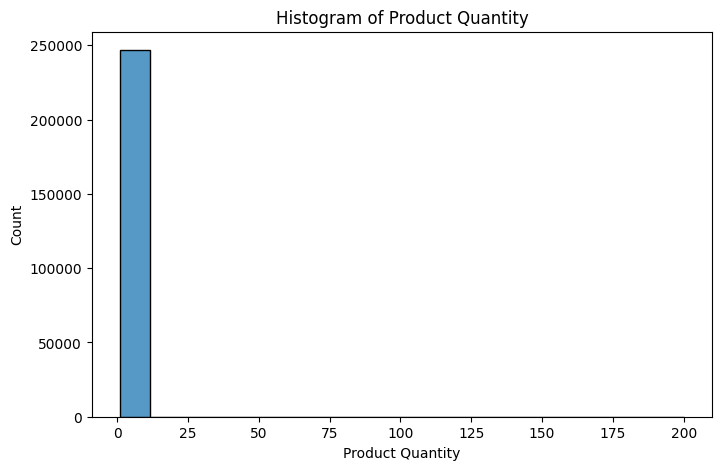

In [ ]:
# creating a histplot to check outliers in product quantity
plt.figure(figsize=(8, 5), frameon=True)
sns.histplot(transactions['product_quantity'])
plt.title('Histogram of Product Quantity')
plt.xlabel('Product Quantity')
plt.show()

There is an one outlier in the `product_quantity` column. Let's make additional checks to understand if this is a data entry error or a valid transaction.

In [238]:
filt_outliers = transactions['product_quantity'] > 100
transactions[filt_outliers]

,date,store_number,loyalty_card_number,transaction_id,product_number,product_name,product_quantity,total_sales,product_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.00,380.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.00,380.00


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

Check the other transactions of this customer with `loyalty_card_number` 226000.

In [239]:
filt_customer = transactions['loyalty_card_number'] == 226000
transactions[filt_customer]

,date,store_number,loyalty_card_number,transaction_id,product_number,product_name,product_quantity,total_sales,product_weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.00,380.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.00,380.00


The customer with `loyalty_card_number` 226000 has made 2 transactions where 200 packets of chips were bought in one transaction. This could indicate that the customer is purchasing chips for a large event or for resale. It seems that this customer is not a regular consumer. We'll remove this `loyalty_card_number` from the dataset.

In [240]:
# removing transactions of the customer with `loyalty_card_number` 226000
transactions = transactions[transactions['loyalty_card_number'] != 226000]
transactions.shape

(246739, 9)

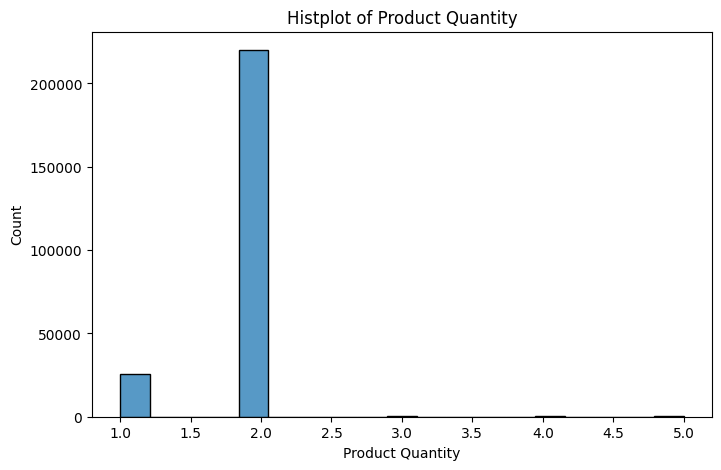

In [254]:
# creating a boxplot to check outliers in product quantity again after removing the outlier transactions
plt.figure(figsize=(8, 5), frameon=True)
sns.histplot(transactions['product_quantity'])
plt.title('Histplot of Product Quantity')
plt.xlabel('Product Quantity')
plt.show()

### Purchase behaviour dataset

Let's explore the purchase behaviour dataset.

In [242]:
# load the purchase behaviour dataset
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

In [243]:
# inspect the first few rows of the purchase behaviour dataset
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [244]:
# shape and columns of dataset
print("Purchase behaviour dataset shape:", purchase_behaviour.shape)
print("Purchase behaviour dataset columns:", purchase_behaviour.columns.tolist())

Purchase behaviour dataset shape: (72637, 3)
Purchase behaviour dataset columns: ['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']


In [245]:
# info about purchase behaviour dataset
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [246]:
# rename columns for better readability
purchase_behaviour.rename(columns={'LYLTY_CARD_NBR': 'loyalty_card_number',
                                  'LIFESTAGE': 'lifestage',
                                  'PREMIUM_CUSTOMER': 'customer_type'}, inplace=True)
# checking the first few rows after renaming columns
purchase_behaviour.head()

,loyalty_card_number,lifestage,customer_type
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [247]:
# checking for data types
purchase_behaviour.dtypes

loyalty_card_number    int64 
lifestage              object
customer_type          object
dtype: object

In [248]:
# count of unique values
purchase_behaviour.nunique()

loyalty_card_number    72637
lifestage              7    
customer_type          3    
dtype: int64

In [249]:
#  counting of lifestage
purchase_behaviour['lifestage'].value_counts()

lifestage
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES            9780 
YOUNG FAMILIES            9178 
MIDAGE SINGLES/COUPLES    7275 
NEW FAMILIES              2549 
Name: count, dtype: int64

In [250]:
# Count of each customer type
purchase_behaviour['customer_type'].value_counts()

customer_type
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [251]:
# checking for missing values
purchase_behaviour.isna().sum()

loyalty_card_number    0
lifestage              0
customer_type          0
dtype: int64

In [252]:
# checking for duplicates
purchase_behaviour.duplicated().sum()

0

In [253]:
# converting lifestage to lowercase
purchase_behaviour['lifestage'] = purchase_behaviour['lifestage'].str.lower()
purchase_behaviour.head()

,loyalty_card_number,lifestage,customer_type
0,1000,young singles/couples,Premium
1,1002,young singles/couples,Mainstream
2,1003,young families,Budget
3,1004,older singles/couples,Mainstream
4,1005,midage singles/couples,Mainstream
